<a href="https://colab.research.google.com/github/Shubha23/Convergence-prediction-based-on-user-behavior/blob/master/KerasFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from __future__ import print_function

# %tensorflow_version 1.x
# import tensorflow as tf

# # Create a graph.
# g = tf.Graph()

# # Establish the graph as the "default" graph.
# with g.as_default():
#   # Assemble a graph consisting of the following three operations:
#   #   * Two tf.constant operations to create the operands.
#   #   * One tf.add operation to add the two operands.
#   x = tf.constant(8, name="x_const")
#   y = tf.constant(5, name="y_const")
#   my_sum = tf.add(x, y, name="x_y_sum")
#   prod = tf.multiply(x,y, name = 'prod1')



#   # Now create a session.
#   # The session will run the default graph.
#   with tf.Session() as sess:
#     print(prod.eval())

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
data = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
x_train.shape    # 60K images each of 28 by 28 pixels

(60000, 28, 28)

In [56]:
x_test.shape

(10000, 28, 28)

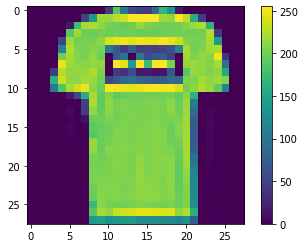

In [57]:
# Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

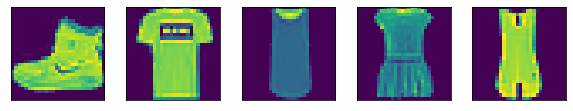

In [58]:
# Data normalization
x_train = x_train/255.0   # To convert pixels in range 0 to 1 for input to neural network.
y_train = y_train/255.0

plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
plt.show()

In [0]:
# ------------- 1st WAY -------------------------
# Modeling - Unoptimized
# To manually flatten use x_train.reshape(60000, 784). 784 as 28*28 1D array from 2D array
model1 = tf.keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                         keras.layers.Dense(128, activation='relu', input_shape=(784,)),
                         keras.layers.Dense(10)
                               ])
       

In [66]:
# To check model architecture in Keras
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Model complilation - includes loss function, optimizer and metrics
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics= ['accuracy'])
print('Model1 compiled!')

Model1 compiled!


*   Loss function : evaluate the degree of error between calculated outputs and the desired outputs of the training data
*   Optimizer : defines how neural network calculate the weights of the parameters from the input data and the defined loss function

*   Metrics : used to monitor the learning process






In [68]:
# Training the model
model1.fit(x_train, y_train, epochs= 5)
print('Model fitted successfully!')

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0027 - accuracy: 0.0999
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 1.7550e-06 - accuracy: 0.1000
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 3.8841e-07 - accuracy: 0.1000
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 1.5058e-07 - accuracy: 0.1000
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 6.6095e-08 - accuracy: 0.1000
Model fitted successfully!


In [71]:
# Model evaluation
loss_, accuracy_ = model1.evaluate(x_test, y_test, verbose=2)
accuracy_

10000/10000 - 0s - loss: 20147.1955 - accuracy: 0.1000


0.1

**Methods to avoid overfitting**

Get more training data.

Reduce the capacity of the network.

Add weight regularization.

Add dropout.

Data-augmentation

Batch normalization

In [70]:
# Generate predictions
# The model's linear outputs are logits. Attach a softmax layer to convert the logits to probabilities for interpretability
pred_model = tf.keras.Sequential([model1, 
                               tf.keras.layers.Softmax()])

# Now predict
predictions = pred_model.predict(x_test)
predictions[0:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)